In [1]:
from pycbc.inference import models, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/work/yifanwang/stacking/theory_quadratic/1126_correct-1/env_corrminus1/lib/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [2]:
result = {}

result['toffset'] = []
for mode in ['REMOVEQ','ALL','NOFOURFOUR']:
    result[mode] = []

for i in range(4,11):
    for mode in ['REMOVEQ','ALL','NOFOURFOUR']:
        f1 = io.loadfile(f"posterior/H1L1-INFERENCE_{mode}{i}.hdf",'r')
        result[mode].append(f1.attrs['log_evidence'])
        if mode == 'REMOVEQ':
            result['toffset'].append(f1.static_params['toffset'])

In [3]:
result = pd.DataFrame(result)

In [4]:
np.exp(result['ALL'] - result['REMOVEQ'])

0    59.589255
1    61.252338
2    74.375282
3    11.641335
4     3.144351
5     5.909707
6     4.899203
dtype: float64

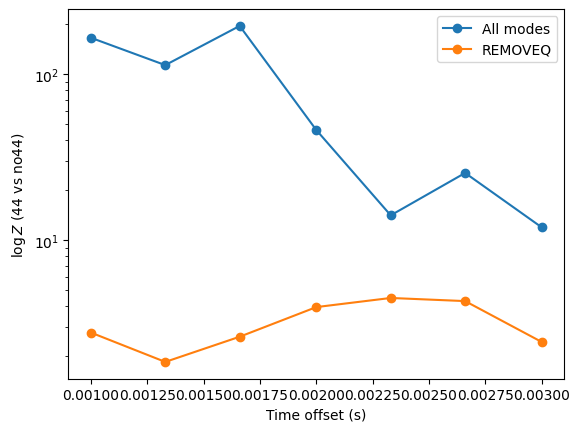

In [5]:
plt.plot(result['toffset'], np.exp(result['ALL'] - result['NOFOURFOUR']), label='All modes', marker='o')
plt.plot(result['toffset'], np.exp(result['REMOVEQ'] - result['NOFOURFOUR']), label='REMOVEQ', marker='o')
plt.legend()
plt.xlabel('Time offset (s)')
plt.ylabel(r'$\log Z$ (44 vs no44)')
plt.yscale('log')

In [6]:
result.to_csv('bayes_factor.csv')